# **Campus Placement Data Analysis and Machine Learning Project.**


This project involves analyzing campus placement data to uncover trends and factors influencing student placement outcomes. Using machine learning models, the project predicts the likelihood of placement for students based on their academic performance, demographic attributes, and extracurricular involvement, helping institutions and students make data-driven decisions for improved placement strategies.

In [86]:
# loading useful libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [87]:
# Loading the dataset for EDA defined as df 
df = pd.read_csv('train.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [88]:
# Exploring dataset in multiple steps 
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,0,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,1,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,0,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,0,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,0,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [89]:
# Checking for the Duplicates
df.duplicated().any()


False

In [90]:
# Statistical Summary of Numeric Variables in Dataset.
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sl_no,215.0,NaN,NaN,NaN,108.0,62.209324,1.0,54.5,108.0,161.5,215.0
gender,215.0,NaN,NaN,NaN,0.353488,0.479168,0.0,0.0,0.0,1.0,1.0
ssc_p,215.0,NaN,NaN,NaN,67.303395,10.827205,40.89,60.6,67.0,75.7,89.4
ssc_b,215,2,Central,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_p,215.0,NaN,NaN,NaN,66.333163,10.897509,37.0,60.9,65.0,73.0,97.7
hsc_b,215,2,Others,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_s,215,3,Commerce,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree_p,215.0,NaN,NaN,NaN,66.370186,7.358743,50.0,61.0,66.0,72.0,91.0
degree_t,215,3,Comm&Mgmt,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workex,215,2,No,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Checking fo null values in  Dataset 

df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [92]:
# Checking for unqiue Values in Different Varaibles.
df.nunique()


sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [93]:
# Checking for unique values in categorical variables 
df['ssc_b'].unique()


array(['Others', 'Central'], dtype=object)

In [94]:
df['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [95]:
df['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [96]:
df['hsc_s'].unique()

array(['Commerce', 'Science', 'Arts'], dtype=object)

# **Feature Engineering.**

In [97]:
# Perform one-hot encoding for the specified columns converted them to boolean from String DataType.
df= pd.get_dummies(df, columns=['ssc_b', 'hsc_b', 'workex'], drop_first=True)

In [98]:
# Creating New Columns from different Categorical Values in Boolean Datatype 
df = pd.get_dummies(df, columns=['hsc_s'], prefix='hsc_s')


In [99]:
df = pd.get_dummies(df, columns=['degree_t'], prefix='degree_t')


In [100]:
df = pd.get_dummies(df, columns=['specialisation'], prefix='specialisation')


In [101]:
# Converting the Input/Label which is in Categorical Form by Mapping into Numeric Form.
df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 0})

**Checking for the Outliers In Dataset Defined as df.** 

In [102]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detect outliers for a single variable
outliers_hsc_p = detect_outliers_iqr(df, 'hsc_p')
print(f"Number of outliers in 'hsc_p': {len(outliers_hsc_p)}")

Number of outliers in 'hsc_p': 8


In [103]:
outliers_hsc_p

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,ssc_b_Others,hsc_b_Others,workex_Yes,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
24,25,0,76.50,97.70,78.86,97.40,74.01,1,360000.0,True,True,False,False,False,True,False,False,True,True,False
42,43,0,49.00,39.00,65.00,63.00,51.21,0,NaN,True,False,False,False,False,True,False,True,False,True,False
49,50,1,50.00,37.00,52.00,65.00,56.11,0,NaN,True,True,False,True,False,False,False,True,False,False,True
120,121,0,58.00,40.00,59.00,73.00,58.81,0,NaN,True,True,False,False,False,True,True,False,False,False,True
134,135,1,77.44,92.00,72.00,94.00,67.13,1,250000.0,False,True,True,False,True,False,True,False,False,True,False
169,170,0,59.96,42.16,61.26,54.48,65.48,0,NaN,True,True,False,False,False,True,False,False,True,False,True
177,178,1,73.00,97.00,79.00,89.00,70.81,1,650000.0,False,True,True,False,True,False,True,False,False,True,False
206,207,0,41.00,42.00,60.00,97.00,53.39,0,NaN,False,False,False,False,False,True,True,False,False,True,False


In [104]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify rows with outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detect outliers for a single variable
outliers_degree_p = detect_outliers_iqr(df, 'degree_p')
print(f"Number of outliers in 'degree_p': {len(outliers_degree_p)}")

Number of outliers in 'degree_p': 1


In [105]:
outliers_degree_p

,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,ssc_b_Others,hsc_b_Others,workex_Yes,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
197,198,1,83.96,53.0,91.0,59.32,69.71,1,260000.0,True,True,False,False,False,True,False,False,True,False,True


In [106]:
# converted df to df2 for next Step of Removinf Outliers.**
df2 = df

**Using IQR Method to Remove Outliers.**

In [107]:
# Calculate IQR
Q1 = df2['hsc_p'].quantile(0.25)
Q3 = df2['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df3 = df2[(df2['hsc_p'] >= lower_bound) & (df2['hsc_p'] <= upper_bound)]

# Check the result
df3


,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,ssc_b_Others,hsc_b_Others,workex_Yes,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,0,67.00,91.00,58.00,55.0,58.80,1,270000.0,True,True,False,False,True,False,False,False,True,False,True
1,2,0,79.33,78.33,77.48,86.5,66.28,1,200000.0,False,True,True,False,False,True,False,False,True,True,False
2,3,0,65.00,68.00,64.00,75.0,57.80,1,250000.0,False,False,False,True,False,False,True,False,False,True,False
3,4,0,56.00,52.00,52.00,66.0,59.43,0,NaN,False,False,False,False,False,True,False,False,True,False,True
4,5,0,85.80,73.60,73.30,96.8,55.50,1,425000.0,False,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,91.0,74.49,1,400000.0,True,True,False,False,True,False,True,False,False,True,False
211,212,0,58.00,60.00,72.00,74.0,53.62,1,275000.0,True,True,False,False,False,True,False,False,True,True,False
212,213,0,67.00,67.00,73.00,59.0,69.72,1,295000.0,True,True,True,False,True,False,True,False,False,True,False
213,214,1,74.00,66.00,58.00,70.0,60.23,1,204000.0,True,True,False,False,True,False,True,False,False,False,True


In [108]:
# Calculate IQR
Q1 = df3['degree_p'].quantile(0.25)
Q3 = df3['degree_p'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df4 = df3[(df3['degree_p'] >= lower_bound) & (df3['degree_p'] <= upper_bound)]

# Check the result
df4


,sl_no,gender,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,ssc_b_Others,hsc_b_Others,workex_Yes,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,0,67.00,91.00,58.00,55.0,58.80,1,270000.0,True,True,False,False,True,False,False,False,True,False,True
1,2,0,79.33,78.33,77.48,86.5,66.28,1,200000.0,False,True,True,False,False,True,False,False,True,True,False
2,3,0,65.00,68.00,64.00,75.0,57.80,1,250000.0,False,False,False,True,False,False,True,False,False,True,False
3,4,0,56.00,52.00,52.00,66.0,59.43,0,NaN,False,False,False,False,False,True,False,False,True,False,True
4,5,0,85.80,73.60,73.30,96.8,55.50,1,425000.0,False,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,82.00,77.60,91.0,74.49,1,400000.0,True,True,False,False,True,False,True,False,False,True,False
211,212,0,58.00,60.00,72.00,74.0,53.62,1,275000.0,True,True,False,False,False,True,False,False,True,True,False
212,213,0,67.00,67.00,73.00,59.0,69.72,1,295000.0,True,True,True,False,True,False,True,False,False,True,False
213,214,1,74.00,66.00,58.00,70.0,60.23,1,204000.0,True,True,False,False,True,False,True,False,False,False,True


**Training The Model (RandomforestClassifier).**

In [109]:

from sklearn.model_selection import train_test_split



# Filter DataFrame for Selected Features and Target
X = df4.drop(columns=['salary','status'])

y = df4['status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train-test split (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
print("\nFeature Importance:\n", feature_importance.sort_values(ascending=False))


Accuracy: 0.9285714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.94      0.97      0.96        33

    accuracy                           0.93        42
   macro avg       0.91      0.87      0.89        42
weighted avg       0.93      0.93      0.93        42


Feature Importance:
 ssc_p                     0.250797
degree_p                  0.155374
hsc_p                     0.147344
mba_p                     0.102353
etest_p                   0.074098
sl_no                     0.065528
specialisation_Mkt&HR     0.034657
specialisation_Mkt&Fin    0.033143
workex_Yes                0.029061
gender                    0.022831
ssc_b_Others              0.017873
hsc_b_Others              0.015865
hsc_s_Commerce            0.013350
degree_t_Comm&Mgmt        0.011356
hsc_s_Science             0.010464
degree_t_Sci&Tech         0.009036
degree_t_Others           0.004858
hs

The model achieves 92.86% accuracy, excelling in classifying class 1 with 94% precision and 97% recall, but slightly lower recall for class 0 at 78%. 

Overall, it performs well, especially for the majority class (class 1).

                   Feature  Importance
2                    ssc_p    0.250797
4                 degree_p    0.155374
3                    hsc_p    0.147344
6                    mba_p    0.102353
5                  etest_p    0.074098
0                    sl_no    0.065528
17   specialisation_Mkt&HR    0.034657
16  specialisation_Mkt&Fin    0.033143
9               workex_Yes    0.029061
1                   gender    0.022831
7             ssc_b_Others    0.017873
8             hsc_b_Others    0.015865
11          hsc_s_Commerce    0.013350
13      degree_t_Comm&Mgmt    0.011356
12           hsc_s_Science    0.010464
15       degree_t_Sci&Tech    0.009036
14         degree_t_Others    0.004858
10              hsc_s_Arts    0.002012


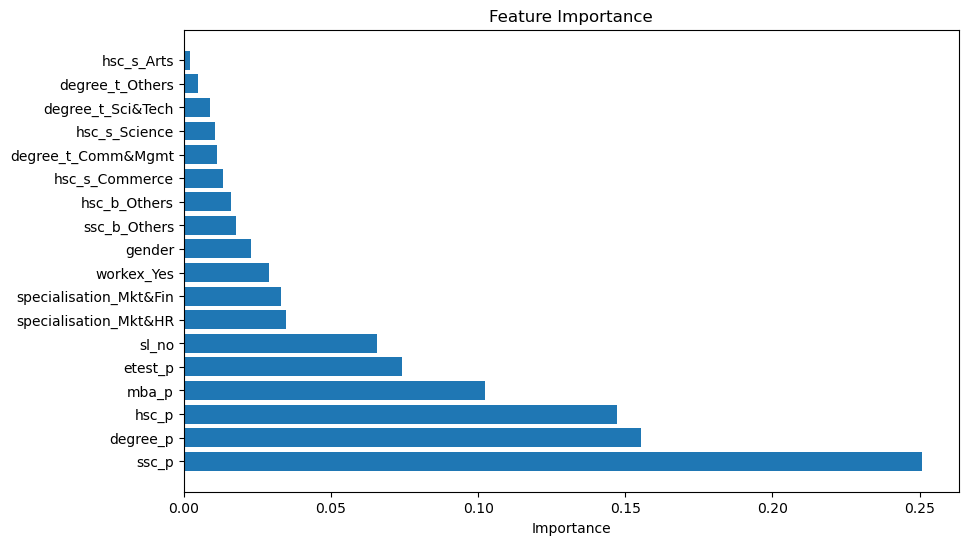

In [111]:
#  This Step is to check Feature importance of  Different Variables with Randomforest Builtin Function.
# Assuming you have your data (X and y)
# X is the feature set, y is the target variable

# Initialize and fit the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Fit model to training data

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # column names for features
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [112]:
#  Saving final ready for model dataset for Deployment is defined as df.
# Save df4 as a CSV file
df4.to_csv('df4.csv', index=False)

# Confirmation message
print("df4 has been saved as 'df4.csv'")


df4 has been saved as 'df4.csv'


In [ ]:
rf_model.predict([[]])
